In [101]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.tree as tree
 


In [131]:
classes = [0, 1]


def gini_impurity(dict_class_counts):
    total = sum(dict_class_counts.values())

    accumulated_sum = 0
    for a_class in classes:
        class_count = dict_class_counts.get(a_class, 0)
        accumulated_sum += (class_count/total)**2

    return 1.0 - accumulated_sum


def attribute_split_test(data, attribute, target):
    positive_branch = data[data[attribute] == 1][target]
    negative_branch = data[data[attribute] == 0][target]

    positive_branch_class_counts = positive_branch.value_counts().to_dict()
    negative_branch_class_counts = negative_branch.value_counts().to_dict()

    positive_branch_impurity = gini_impurity(positive_branch_class_counts)
    negative_branch_impurity = gini_impurity(negative_branch_class_counts)

    positive_branch_weight = positive_branch.shape[0]/float(data.shape[0])
    negative_branch_weight = negative_branch.shape[0] / float(data.shape[0])

    split_impurity = positive_branch_weight*positive_branch_impurity + negative_branch_weight*negative_branch_impurity
    info = [positive_branch_class_counts, positive_branch_impurity, positive_branch_weight, negative_branch_class_counts, negative_branch_impurity, negative_branch_weight]
    return split_impurity


In [132]:
df = pd.read_csv("animal_class_dataset.tsv", sep="\t")
features = list(set(df.columns) - {"name", "animal_class"})
df["target"] = df.animal_class.apply(lambda x: 1 if x == "mammals" else 0)

In [146]:
df.head()

,name,gives_birth,warm-blooded,aquatic_creature,aerial_creature,has_legs,hibernates,animal_class,target
0,human,1,1,0,0,1,0,mammals,1
1,python,0,0,0,0,0,1,reptiles,0
2,salmon,0,0,1,0,0,0,fish,0
3,whale,1,1,1,0,0,0,mammals,1
4,frog,0,0,1,0,1,1,amphibians,0


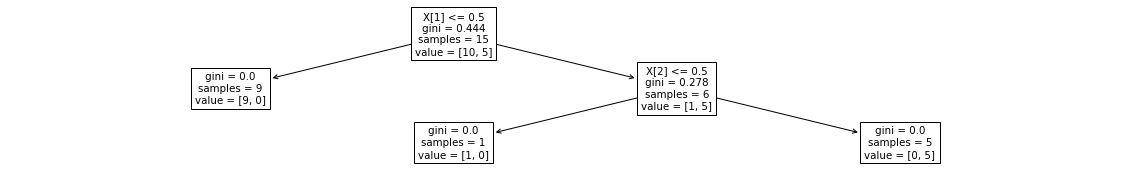

In [145]:
clf = DecisionTreeClassifier(max_depth=2, random_state=10)
X_train = df[features].astype(bool)
clf.fit(X_train, df["target"])

plt.rcParams["figure.figsize"] = (20,3)
tree.plot_tree(clf)
plt.show()

In [135]:
parent_gini = gini_impurity(df.target.value_counts().to_dict())
print("parent gini: ", parent_gini)

parent gini:  0.4444444444444444


In [144]:
sorted([(feature, np.round(attribute_split_test(df, feature, target="target"), 2)) for feature in features], key=lambda x: x[1])

[('gives_birth', 0.11),
 ('warm-blooded', 0.19),
 ('aquatic_creature', 0.35),
 ('has_legs', 0.43),
 ('hibernates', 0.44),
 ('aerial_creature', 0.44)]

# use gives birth

In [137]:
gives_birth_pos = df[df.gives_birth == 1]
gives_birth_neg = df[df.gives_birth == 0]

In [148]:
gives_birth_pos.target.value_counts()

1    5
0    1
Name: target, dtype: int64

In [149]:
gb_pos_gini = gini_impurity(gives_birth_pos.target.value_counts().to_dict())
print("gives birth pos gini: ", gb_pos_gini)

gives birth pos gini:  0.2777777777777777


In [139]:
gb_neg_gini = gini_impurity(gives_birth_neg.target.value_counts().to_dict())
print("gives birth neg gini: ", gb_neg_gini)

gives birth neg gini:  0.0


In [140]:
features_2 = set(features) - {"gives_birth"}

In [151]:
sorted([(feature, np.round(attribute_split_test(gives_birth_pos, feature, target="target"), 2)) for feature in features_2], key=lambda x: x[1])

[('warm-blooded', 0.0),
 ('aquatic_creature', 0.17),
 ('has_legs', 0.17),
 ('hibernates', 0.25),
 ('aerial_creature', 0.27)]